In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
HYPE = 'criterion'
HYPE_TITLE = 'Criterion'
METHOD = 'decision_tree'
METHOD_TITLE = 'Decision Tree'

In [5]:
dir = f"../{METHOD}/results"
os.listdir(dir)

['entropy.png',
 'cross_val_data.csv',
 'gini.png',
 'log_loss.png',
 'data.csv',
 'data_manual_cv.csv']

In [6]:
df = pd.read_csv(os.path.join(dir, 'data_manual_cv.csv'))

In [7]:
df.columns

Index(['input_type', 'criterion', 'fit_time', 'eval_time', 'accuracy',
       'test_set'],
      dtype='object')

In [8]:
new_df = df.drop(columns=['test_set', 'accuracy', 'eval_time', 'fit_time']).drop_duplicates()
print(len(df))
print(len(new_df))
new_df.reset_index(drop=True, inplace=True)

24
6


In [9]:
for i, row in new_df.iterrows():
    selection = df[np.logical_and(
        df[HYPE] == row[HYPE],
        df['input_type'] == row['input_type']
    )]
    assert(len(selection) == 4)
    new_df.loc[i, 'accuracy'] = selection['accuracy'].mean()
    new_df.loc[i, 'eval_time'] = selection['eval_time'].mean()
    new_df.loc[i, 'fit_time'] = selection['fit_time'].mean()
df = new_df

In [10]:
images_df = df[df['input_type'] == 'images']
features_df = df[df['input_type'] == 'features']

In [11]:
print(images_df[HYPE])
print(features_df[HYPE])

0     entropy
2        gini
4    log_loss
Name: criterion, dtype: object
1     entropy
3        gini
5    log_loss
Name: criterion, dtype: object


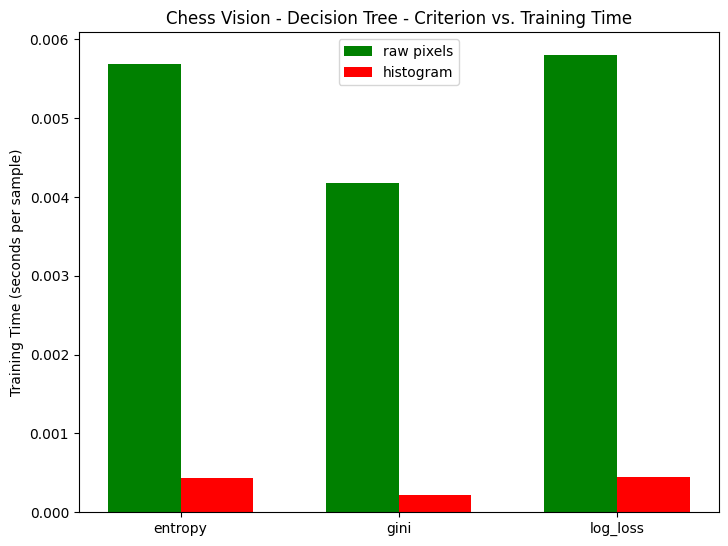

In [17]:
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X, images_df['fit_time'], color = 'g', width = 0.333, label='raw pixels')
ax.bar(X + 0.333, features_df['fit_time'], color = 'r', width = 0.333, label='histogram')

ax.set_xticks(X+0.1667, tuple(images_df[HYPE]))

plt.title(f"Chess Vision - {METHOD_TITLE} - {HYPE_TITLE} vs. Training Time")
plt.ylabel('Training Time (seconds per sample)')
plt.legend()
plt.show()

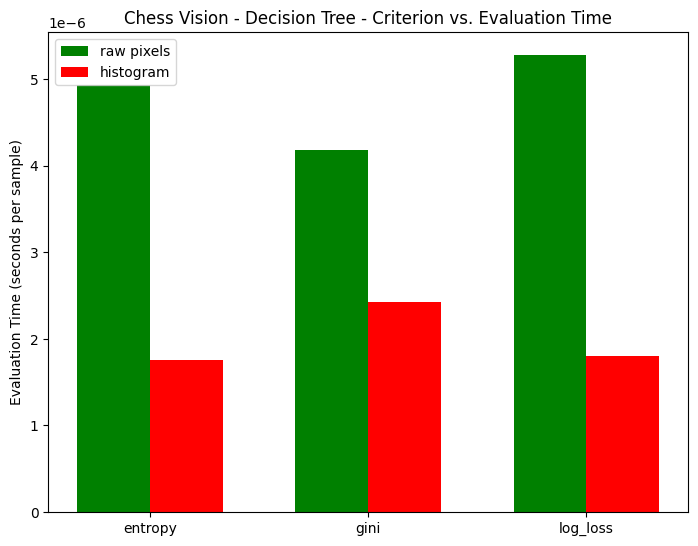

In [18]:
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X, images_df['eval_time'], color = 'g', width = 0.333, label='raw pixels')
ax.bar(X + 0.333, features_df['eval_time'], color = 'r', width = 0.333, label='histogram')

ax.set_xticks(X+0.1667, tuple(images_df[HYPE]))

plt.title(f"Chess Vision - {METHOD_TITLE} - {HYPE_TITLE} vs. Evaluation Time")
plt.ylabel('Evaluation Time (seconds per sample)')
plt.legend()
plt.show()

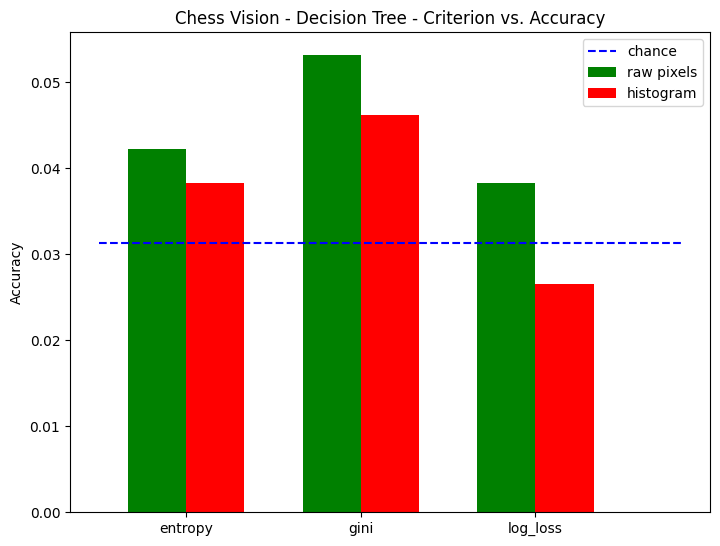

In [16]:
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X, images_df['accuracy'], color = 'g', width = 0.333, label='raw pixels')
ax.bar(X + 0.333, features_df['accuracy'], color = 'r', width = 0.333, label='histogram')
ax.plot([-0.333, 3], [1/32, 1/32],  'b--', label='chance')

ax.set_xticks(X+0.1667, tuple(images_df[HYPE]))

plt.title(f"Chess Vision - {METHOD_TITLE} - {HYPE_TITLE} vs. Accuracy")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
df.sort_values('accuracy').iloc[-1]

input_type      images
criterion         gini
accuracy      0.053125
eval_time     0.000004
fit_time      0.004174
Name: 2, dtype: object